In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler

In [2]:
datas=pd.read_csv("datas.csv")
datas

,id_jugador,nombre_jugador,version_x,posiciones,est_general_x,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,id_liga_y,nombre_liga_y,id_nacionalidad_y,nacion_liga,est_general_y,ataque,mediocampo,defensa_y,promedio_edad_titulares,promedio_edad_equipo
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,31,serie a,27,italia,74,75,72,74,26.18,24.97
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,02 10 1981,183,...,16,ligue 1,18,francia,69,70,70,68,27.91,24.47
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,08 11 1981,176,...,13,premier league,14,inglaterra,74,76,74,73,26.00,24.64
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,29 09 1981,180,...,53,la liga 2,45,espana,72,72,71,72,25.91,24.62
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,11 05 1984,170,...,53,la liga,45,espana,84,87,84,81,27.27,25.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,02 12 2002,174,...,350,pro league,183,arabia saudita,66,66,67,61,26.36,26.82
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,26 04 2006,178,...,60,league two,14,inglaterra,60,62,60,58,21.64,21.61
180018,278139,Rodrigo Frutos,2024,POR,58,375000,500,20,06 01 2003,188,...,337,primera divisin,58,paraguay,72,73,72,71,32.00,28.93
180019,278141,Christian Bos,2024,LAD,55,275000,500,18,27 01 2005,180,...,10,eredivisie,34,paises bajos,67,75,66,65,24.00,22.96


In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 97 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id_jugador               180021 non-null  int64  
 1   nombre_jugador           180021 non-null  object 
 2   version_x                180021 non-null  int64  
 3   posiciones               180021 non-null  object 
 4   est_general_x            180021 non-null  int64  
 5   valor_de_mercado         180021 non-null  int64  
 6   salario_semanal          180021 non-null  int64  
 7   edad                     180021 non-null  int64  
 8   nacimiento               180021 non-null  object 
 9   altura                   180021 non-null  int64  
 10  id_equipo                180021 non-null  float64
 11  nombre_club_x            180021 non-null  object 
 12  id_liga_x                180021 non-null  int64  
 13  nombre_liga_x            180021 non-null  object 
 14  posi

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Lista de columnas a excluir
columnas_excluir = ['id_jugador', 'nombre_jugador', 'version_x', 'posiciones', 'salario_semanal', 
                    'nacimiento', 'altura', 'id_equipo', 'nombre_club_x', 'id_liga_x', 'nombre_liga_x', 
                    'posicion_club', 'id_nacionalidad_x', 'nacionalidad', 'pierna', 'centros_ataque', 
                    'remate_cabeza', 'pase_corto_ataque', 'volea', 'habilidad_regate', 'efecto', 
                    'habilidad_control', 'velocidad_max', 'agilidad', 'reaccion', 'potencia_salto', 
                    'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'penalties', 'abordaje', 'manejo', 
                    'pateo', 'reflejos', 'velocidad_por', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 
                    'media_punta', 'seg_del_dch', 'extr_dch', 'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 
                    'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch', 'med_dch', 'carr_izq', 'med_def_izq', 
                    'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 'def_cen_izq', 'def_cen', 
                    'def_cen_dch', 'lat_dch', 'portero', 'nombre_club_y', 'version_y', 'id_liga_y', 
                    'nombre_liga_y', 'id_nacionalidad_y', 'nacion_liga', 'est_general_y', 'ataque', 
                    'mediocampo', 'defensa_y', 'promedio_edad_titulares', 'promedio_edad_equipo']

# Suponiendo que 'df' es tu DataFrame original

# Paso 1: Filtrar las columnas restantes
columnas_a_estandarizar = [col for col in datas.columns if col not in columnas_excluir]

# Paso 2: Estandarizar las columnas seleccionadas
scaler = StandardScaler()
datas[columnas_a_estandarizar] = scaler.fit_transform(datas[columnas_a_estandarizar])

# Ahora, las columnas seleccionadas están estandarizadas, con media 0 y desviación estándar 1.
datas[columnas_a_estandarizar]

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,...,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
0,0.325914,-0.272351,1.466288,0.450367,0.614608,0.955012,0.528640,1.303395,0.865751,0.171784,...,0.216473,1.058657,0.877532,1.243359,0.673524,-0.154120,1.180717,1.303144,-0.198735,-0.427821
1,0.325914,-0.272351,1.466288,-0.673052,0.817215,1.214433,0.684911,0.397464,0.564654,0.431105,...,-0.067561,0.993256,-0.571225,0.802492,0.725522,1.325391,0.007263,0.537580,-0.595075,-0.545403
2,1.180848,0.008015,1.466288,-0.200033,1.357498,1.992699,1.622537,-0.810443,-0.489188,1.209068,...,1.281600,0.993256,-1.894003,-0.422140,1.141504,1.959467,-0.579464,-0.802157,-0.481835,-0.075073
3,1.465826,0.316823,1.466288,-1.619088,-0.803637,-1.293311,-1.112205,-0.085699,-1.016109,-1.072956,...,-0.280586,-1.753557,-1.956993,-1.058949,-1.302393,-1.985896,-1.019509,-0.993548,3.311704,3.569982
4,3.318183,5.469045,1.038880,0.686876,1.492569,2.943912,2.482027,0.578650,0.113007,1.416525,...,1.565634,0.535454,0.940521,1.047418,1.921471,2.804902,0.545096,0.489732,-0.595075,-0.192656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,-1.668933,-0.341426,-1.098157,0.154731,-1.073779,-0.947415,-0.799663,0.276673,0.113007,-0.813635,...,0.784541,-0.510951,0.688564,0.263653,-0.886411,-0.717744,0.447308,0.489732,-0.198735,-0.486612
180017,-2.096400,-0.360930,-1.739268,0.391240,-0.330889,-0.515046,-0.408985,-0.508466,-0.639737,-0.139401,...,1.068575,-0.314750,-0.004320,-0.373155,-0.158441,-0.154120,-0.237207,-0.275832,-0.142115,-0.604194
180018,-1.098977,-0.321110,-1.098157,-2.328616,-1.411456,-0.774467,-2.127966,-1.052025,-2.220500,-1.902783,...,-1.345713,-0.837953,-2.082972,-1.548802,-2.082361,-1.140461,-1.557342,-1.663417,2.462404,2.217784
180019,-1.526444,-0.337363,-1.525564,0.213858,-1.073779,-1.293311,-0.799663,0.216278,-1.091384,-0.813635,...,-0.422603,-0.707152,-1.327098,0.459595,-0.158441,-0.717744,0.349520,0.441884,-0.425215,-0.604194


In [5]:
datas[columnas_a_estandarizar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   est_general_x         180021 non-null  float64
 1   valor_de_mercado      180021 non-null  float64
 2   edad                  180021 non-null  float64
 3   ritmo                 180021 non-null  float64
 4   chut                  180021 non-null  float64
 5   pase                  180021 non-null  float64
 6   regate                180021 non-null  float64
 7   defensa_x             180021 non-null  float64
 8   fisico                180021 non-null  float64
 9   finalizacion          180021 non-null  float64
 10  eficacia_faltas       180021 non-null  float64
 11  habilidad_pase_largo  180021 non-null  float64
 12  aceleracion           180021 non-null  float64
 13  equilibrio            180021 non-null  float64
 14  potencia_tiro         180021 non-null  float64
 15  

In [6]:
len(datas[columnas_a_estandarizar].columns)

23

In [7]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(datas[columnas_a_estandarizar])

In [8]:
pd.DataFrame(X_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
1,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
2,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
3,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
4,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
5,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
6,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0
7,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,0.0,0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0
8,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
9,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,...,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0


In [9]:
autovalores = pca.singular_values_ ** 2
autovalores

array([2.01282100e+06, 7.82344869e+05, 4.37926178e+05, 1.96589538e+05,
       1.58448103e+05, 1.30914201e+05, 7.52366957e+04, 5.72140568e+04,
       5.03804127e+04, 4.59275940e+04, 4.05760136e+04, 3.46957324e+04,
       2.67925816e+04, 1.91980889e+04, 1.70540515e+04, 1.38412214e+04,
       1.09868431e+04, 1.02924700e+04, 5.88887677e+03, 5.43925712e+03,
       4.94621671e+03, 1.79660004e+03, 1.17240352e+03])

In [10]:
porcentaje=autovalores/ autovalores.sum() 
porcentaje

array([4.86131931e-01, 1.88950146e-01, 1.05766931e-01, 4.74798563e-02,
       3.82680240e-02, 3.16180989e-02, 1.81709949e-02, 1.38182084e-02,
       1.21677622e-02, 1.10923276e-02, 9.79982617e-03, 8.37963406e-03,
       6.47088313e-03, 4.63667860e-03, 4.11885557e-03, 3.34290019e-03,
       2.65351727e-03, 2.48581387e-03, 1.42226807e-03, 1.31367696e-03,
       1.19459897e-03, 4.33910738e-04, 2.83156222e-04])

In [11]:
porcentaje.cumsum()

array([0.48613193, 0.67508208, 0.78084901, 0.82832886, 0.86659689,
       0.89821499, 0.91638598, 0.93020419, 0.94237195, 0.95346428,
       0.96326411, 0.97164374, 0.97811462, 0.9827513 , 0.98687016,
       0.99021306, 0.99286658, 0.99535239, 0.99677466, 0.99808833,
       0.99928293, 0.99971684, 1.        ])

In [12]:
variabilidad = pca.explained_variance_ratio_

In [13]:
variabilidad[0:4]

array([0.48613193, 0.18895015, 0.10576693, 0.04747986])

In [14]:
sum(variabilidad[0:4])

0.8283288640978407

In [15]:
data_clean = pd.DataFrame(X_pca).loc[:,0:4]

In [16]:
data_clean.head(2)

,0,1,2,3,4
0,-2.945601,-1.843479,0.855441,-0.956539,-0.472914
1,-2.093976,-0.237244,1.687848,-1.559486,-0.994982


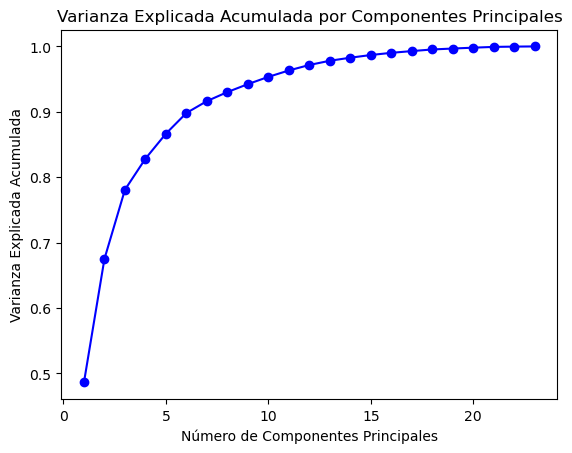

In [17]:
# Graficar la varianza explicada acumulada
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', color='b')

# Añadir etiquetas
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()


In [18]:
acum = []
for i in range(2,9):
    model = KMeans(
        n_clusters=i, # número de centroides
        n_init = 10, # número de semillas diferentes que va a probar el algoritmo
        max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
    )
    model.fit(data_clean)
    acum.append([i,model.inertia_])

In [19]:
tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,2,2.156352e+06
1,3,1.531234e+06
2,4,1.120153e+06
3,5,9.668164e+05
4,6,8.633609e+05
5,7,7.864171e+05
6,8,7.125606e+05


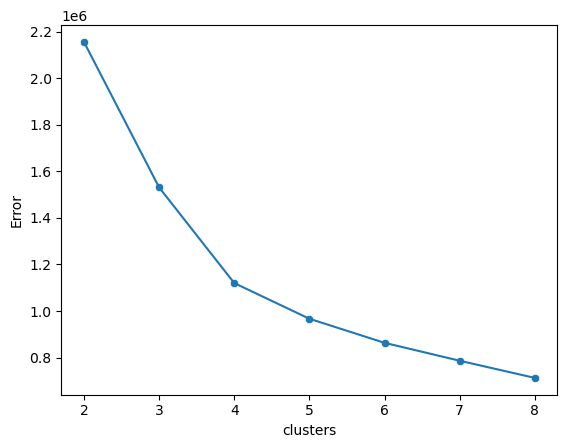

In [20]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")
sns.scatterplot(data = tabla_codo, x="clusters", y = "Error")
plt.show()

In [21]:
# genero modelo
model = KMeans(
    n_clusters=4, # número de centroides
    n_init = 10, # número de semillas diferentes que va a probar el algoritmo
    max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
)

model.fit(data_clean)

KMeans(n_clusters=4, n_init=10)

In [22]:
data_clean["cluster"]=model.labels_

In [23]:
data_clean.groupby("cluster").mean()

,0,1,2,3,4
cluster,,,,,
0,-2.986126,-0.496027,0.870146,0.090528,-0.286362
1,-0.629211,2.296051,-0.760997,-0.266131,0.214827
2,7.643339,0.912994,1.974200,0.505560,-0.301241
3,0.759540,-2.168699,-0.854653,-0.013220,0.185508


In [47]:
data_clean.shape

(180021, 6)

In [24]:
silhouette_avg = silhouette_score(data_clean, model.labels_)
print("La puntuación promedio de silueta es:", silhouette_avg)

La puntuación promedio de silueta es: 0.40613096156167783


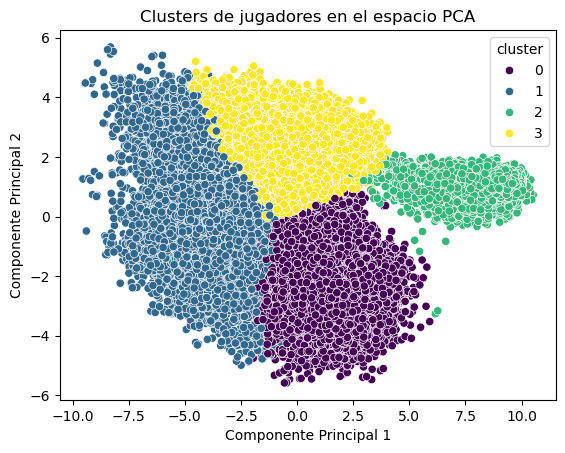

In [29]:
sns.scatterplot(x=0, y=1, hue='cluster', data=data_clean, palette='viridis')
plt.title("Clusters de jugadores en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

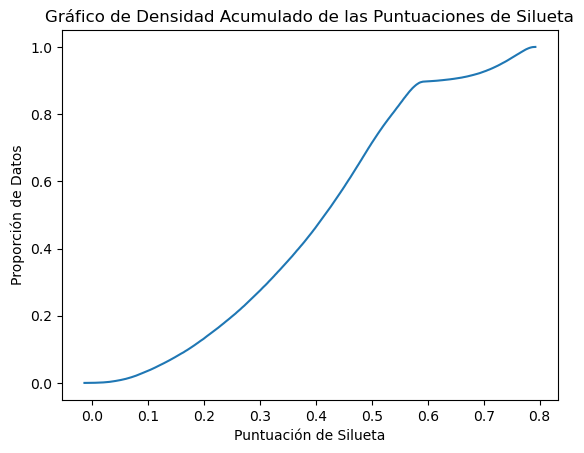

In [53]:
sample_silhouette_values = silhouette_samples(data_clean, model.labels_)
plt.plot(np.sort(sample_silhouette_values), np.arange(len(sample_silhouette_values)) / len(sample_silhouette_values))
plt.xlabel('Puntuación de Silueta')
plt.ylabel('Proporción de Datos')
plt.title('Gráfico de Densidad Acumulado de las Puntuaciones de Silueta')
plt.show()